<a href="https://colab.research.google.com/github/NajlaZuhir/CRM_Data/blob/main/AI_profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature 1: AI profiling

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ML models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [153]:
df = pd.read_csv("generated_data.csv")

In [154]:
df.head()

,Tourist_ID,Reservation_ID,passport_number,Name,Age,Gender,phone_number,Nationality,Nationality_group,family_size,...,Location,customer_tenure,package_types,package_cost,package_price,profit,Total_Spendings,Subscribed_to_Loyalty_Program,Rating_of_Services,Feedback
0,1001,1,827630685,Kristina Johnson,57,Male,601-329-7255x5004,Mexico,Other Arab,7,...,Al Wakrah,1060,Adventure Tours,500,1200,700,11194,True,5,"The desert safari was a thrilling adventure, o..."
1,1002,2,238889638,Alexander Patel,51,Male,469.504.3138,Heard Island and McDonald Islands,GCC,1,...,Umm Salal Mohammed,1626,Luxury and VIP Tours,1500,3000,1500,14808,False,5,"The weather can be extremely hot, making outdo..."
2,1003,3,485215282,Brandon Lopez,24,Female,+1-883-454-7981x4527,France,Europe,1,...,Al Khor,1345,Beach and Resort Tours,800,1500,700,18157,False,4,"Qatar's safety measures are top-notch, ensurin..."
3,1004,4,553248312,Patrick Navarro,29,Male,537.394.8789,United Kingdom,Americans,7,...,Doha,1030,Cultural Tours,400,800,400,4242,False,1,"Local markets offer authentic products, but ba..."
4,1005,5,772932884,Martin Berger,69,Male,(516)253-7305x003,Uzbekistan,Other Arab,5,...,Umm Salal Mohammed,336,Adventure Tours,500,1200,700,29442,True,3,Tourist guides play a crucial role in enhancin...


# Preprosessing & Understanding the data

for this section we need to update the data and make it more realistic

In [155]:
df.info()

#missing_values = df.isnull().sum()

# we will do more of that after making the data raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Tourist_ID                     5000 non-null   int64 
 1   Reservation_ID                 5000 non-null   int64 
 2   passport_number                5000 non-null   int64 
 3   Name                           5000 non-null   object
 4   Age                            5000 non-null   int64 
 5   Gender                         5000 non-null   object
 6   phone_number                   5000 non-null   object
 7   Nationality                    5000 non-null   object
 8   Nationality_group              5000 non-null   object
 9   family_size                    5000 non-null   int64 
 10  health_insurance               5000 non-null   object
 11  Date_Of_Reservation            5000 non-null   object
 12  Date_Of_arival                 5000 non-null   object
 13  arr

# RFM analysis (Feature engineering )

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result)



**Scoring RFM**
-  As 'Recency_Score' increases, it indicates that the tourist visited more recently. (inversely proportional)
- As 'Frequency_Score' increases, it indicates that the tourist has visited more frequently. (positive)
- As 'Monetary_Score' increases, it indicates higher spending by the tourist. (positive)

In [156]:
# Convert 'Date_Of_arival' to datetime format
df['Date_Of_arival'] = pd.to_datetime(df['Date_Of_arival'])

# Calculate RFM
current_date = datetime.now()
df['Recency'] = (current_date - df['Date_Of_arival']).dt.days
df['Recency_Score'] = pd.cut(df['Recency'], bins=5, labels=[5, 4, 3, 2, 1])
df['Frequency_Score'] = pd.cut(df['Num_of_Visits'], bins=5, labels=[1, 2, 3, 4, 5])
df['Monetary_Score'] = pd.cut(df['Total_Spendings'], bins=5, labels=[1, 2, 3, 4, 5])


In [157]:
df[['Tourist_ID', 'Date_Of_arival', 'Recency_Score', 'Num_of_Visits', 'Frequency_Score',  'Total_Spendings', 'Monetary_Score']].head(10)


,Tourist_ID,Date_Of_arival,Recency_Score,Num_of_Visits,Frequency_Score,Total_Spendings,Monetary_Score
0,1001,2022-12-11,4,3,2,11194,2
1,1002,2019-08-04,1,3,2,14808,3
2,1003,2023-06-18,5,4,3,18157,3
3,1004,2020-10-12,2,3,2,4242,1
4,1005,2020-01-29,1,1,1,29442,5
5,1006,2021-02-26,3,3,2,14819,3
6,1007,2020-08-23,2,7,5,9334,2
7,1008,2023-02-02,5,6,5,12776,2
8,1009,2020-10-27,2,4,3,9759,2
9,1010,2023-05-14,5,2,1,12236,2


**Calculating RFM Overall**

RFM overall: evaluating customer behavior based on three key dimensions to better understand and engage with customers based on their historical behavior.

1-	Recency: Recent customers may be more likely to respond to promotions and engage with services. Therefore, we can assign a relatively higher weight. Let’s Pick (3)

2-	Frequency:  If the goal is to reward and retain loyal customers, we can assign a moderate weight to Frequency. Let’s Pick (2)

3-	Monetary: If high spenders are important, we can give a higher weight. But maybe the spender is a one time or rare so let’s pick (1)


In [158]:
# Assign weights to each component
weight_recency = 3
weight_frequency = 2
weight_monetary = 1

# Convert categorical scores to numeric
df['Recency_Score'] = df['Recency_Score'].astype(int)
df['Frequency_Score'] = df['Frequency_Score'].astype(int)
df['Monetary_Score'] = df['Monetary_Score'].astype(int)

# Calculate RFM scores
df['RFM_Score'] = (
    weight_recency * df['Recency_Score'] +
    weight_frequency * df['Frequency_Score'] +
    weight_monetary * df['Monetary_Score']
)

# Display the overall RFM scores
df[['Tourist_ID', 'Recency_Score', 'Frequency_Score', 'Monetary_Score', 'RFM_Score']].head()

,Tourist_ID,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,1001,4,2,2,18
1,1002,1,2,3,10
2,1003,5,3,3,24
3,1004,2,2,1,11
4,1005,1,1,5,10


**RFM Labelling**

Labelling customers based on the RFM overall

In [159]:
# Find the maximum RFM score
max_rfm_score = df['RFM_Score'].max()

# Create bins dynamically based on the maximum RFM score
bins = [0, max_rfm_score * 0.2, max_rfm_score * 0.4, max_rfm_score * 0.6, max_rfm_score * 0.8, max_rfm_score]
labels = ['Inactive or Lost', 'Churning or At Risk', 'Recent and Infrequent Visitors', 'Frequent Visitors', 'High-Value Tourists']

# Define the categories based on RFM scores
df['RFM_Category'] = pd.cut(df['RFM_Score'], bins=bins, labels=labels)
df['RFM_Category_encoded'] = pd.cut(df['RFM_Score'], bins=bins, labels=[0,1,2,3,4])

In [160]:
# just to print
df[['Tourist_ID', 'Date_Of_arival', 'Recency_Score', 'Num_of_Visits', 'Frequency_Score',  'Total_Spendings', 'Monetary_Score', 'RFM_Score', 'RFM_Category', 'RFM_Category_encoded']].head(10)

,Tourist_ID,Date_Of_arival,Recency_Score,Num_of_Visits,Frequency_Score,Total_Spendings,Monetary_Score,RFM_Score,RFM_Category,RFM_Category_encoded
0,1001,2022-12-11,4,3,2,11194,2,18,Recent and Infrequent Visitors,2
1,1002,2019-08-04,1,3,2,14808,3,10,Churning or At Risk,1
2,1003,2023-06-18,5,4,3,18157,3,24,Frequent Visitors,3
3,1004,2020-10-12,2,3,2,4242,1,11,Churning or At Risk,1
4,1005,2020-01-29,1,1,1,29442,5,10,Churning or At Risk,1
5,1006,2021-02-26,3,3,2,14819,3,16,Recent and Infrequent Visitors,2
6,1007,2020-08-23,2,7,5,9334,2,18,Recent and Infrequent Visitors,2
7,1008,2023-02-02,5,6,5,12776,2,27,High-Value Tourists,4
8,1009,2020-10-27,2,4,3,9759,2,14,Recent and Infrequent Visitors,2
9,1010,2023-05-14,5,2,1,12236,2,19,Frequent Visitors,3


# Clustering Functions

**Elbow**

In [161]:
# prompt: generate function that uses elbow method to calculate optimal number of clusters

def elbow_method(data, max_clusters=10):
    WCS = [] # inertia

    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(data)
        WCS.append(km.inertia_)

    plt.plot(range(1, max_clusters + 1), WCS, marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion")
    plt.show()


**Silhoutte**

In [162]:
def silhouette_method(data, max_clusters=10):
    sil_scores = []

    for i in range(2, max_clusters + 1):
        km = KMeans(n_clusters=i, random_state=0)
        preds = km.fit_predict(data)

        score = silhouette_score(data, preds)
        sil_scores.append(score)

    plt.plot(range(2, max_clusters + 1), sil_scores, marker='o')  # Corrected variable name
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.show()


**Kmeans**

In [169]:
def kmeans_clustering(X, num_clusters=3):
    # Check and encode columns if needed
    encoded_columns = [encode_column_if_needed(X, col) for col in X.columns]

    # Combine the encoded columns into a DataFrame
    X_encoded = pd.DataFrame({col: encoded_col for col, encoded_col in zip(X.columns, encoded_columns)})

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_encoded)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans.fit_predict(scaled_data)

    # Visualize the clusters (only possible for 2D or 3D data)
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel(f'{X.columns[0]} (Standardized)')
    plt.ylabel(f'{X.columns[1]} (Standardized)')
    plt.show()

**Encoding**

In [164]:
def encode_column_if_needed(df, column_name):
    if df[column_name].dtype == 'object':
        # Check if the column is non-numeric (assumed categorical)
        le = LabelEncoder()
        encoded_column = le.fit_transform(df[column_name])
        print(f"Column '{column_name}' encoded.")
        return encoded_column
    else:
        print(f"Column '{column_name}' is already numeric (encoded).")
        return df[column_name]

# Customer Segmentation

### MeaningFul

**Segmentation 1: RFM_Category and Nationality_group**

i will keep RFM_Category in y-axis and its created using RFM_score

Column 'Nationality_group' encoded.
Column 'RFM_Category_encoded' is already numeric (encoded).


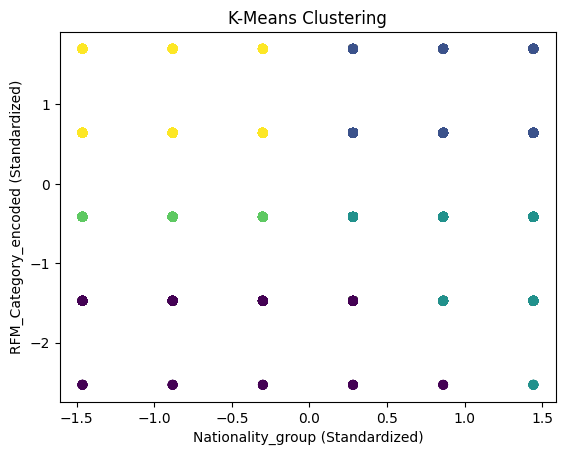

In [165]:
X = df[['Nationality_group', 'RFM_Category_encoded']]
kmeans_clustering(X, num_clusters=5)

**Segmentation 2: RFM_Category and Occupation**


Column 'Occupation' encoded.
Column 'RFM_Category_encoded' is already numeric (encoded).


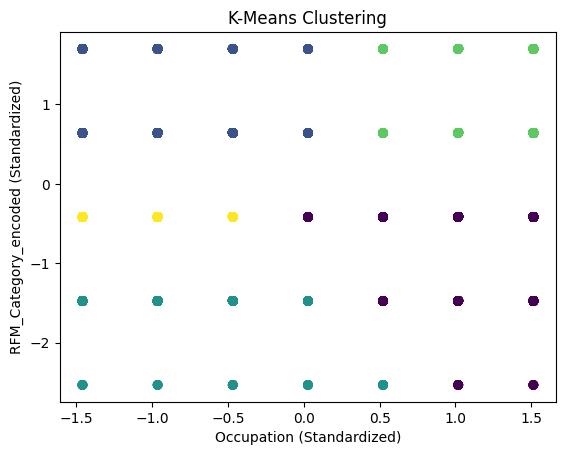

In [170]:
X = df[['Occupation', 'RFM_Category_encoded']]
kmeans_clustering(X, num_clusters=5)

**Segmentation 3: RFM_Category and Recency_Score**

Column 'Recency_Score' is already numeric (encoded).
Column 'RFM_Category_encoded' is already numeric (encoded).


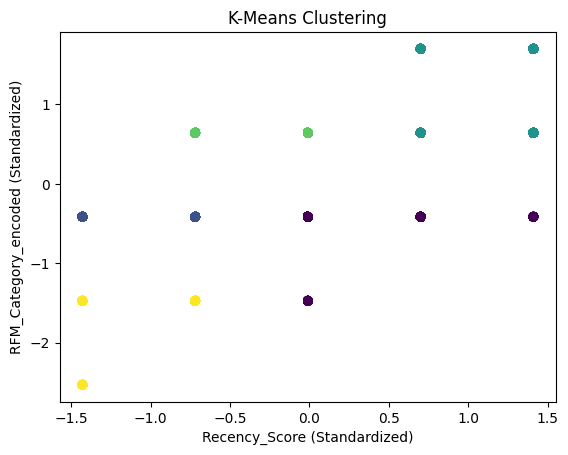

In [180]:
X = df[['Recency_Score', 'RFM_Category_encoded']]
kmeans_clustering(X, num_clusters=5)

**Segmentation 4: RFM_Category and package_types**

Column 'package_types' encoded.
Column 'RFM_Category_encoded' is already numeric (encoded).


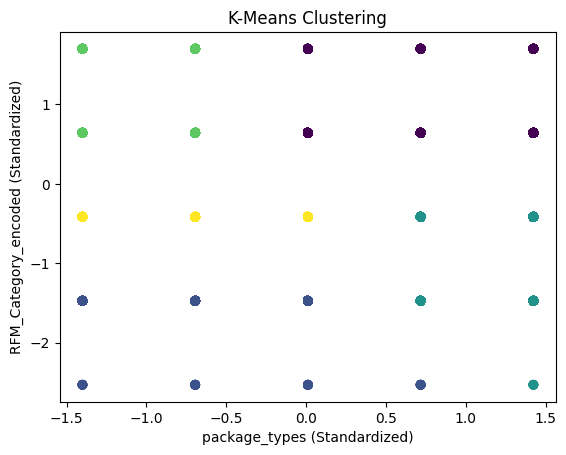

In [181]:
X = df[['package_types', 'RFM_Category_encoded']]
kmeans_clustering(X, num_clusters=5)

### less meaninful
if required ill explain

**Segmentation A: RFM_Category and Preferred_Travel_Seasons**

Column 'Preferred_Travel_Seasons' encoded.
Column 'RFM_Category_encoded' is already numeric (encoded).


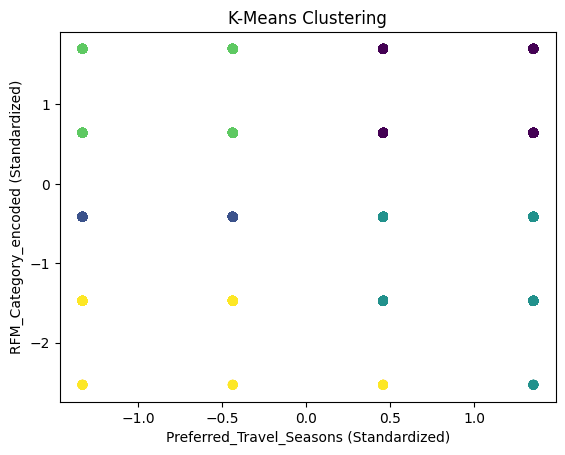

In [171]:
X = df[['Preferred_Travel_Seasons', 'RFM_Category_encoded']]
kmeans_clustering(X, num_clusters=5)

**Segmentation B: RFM_Category and Random_Event_Type**

Column 'Random_Event_Type' encoded.
Column 'RFM_Category_encoded' is already numeric (encoded).


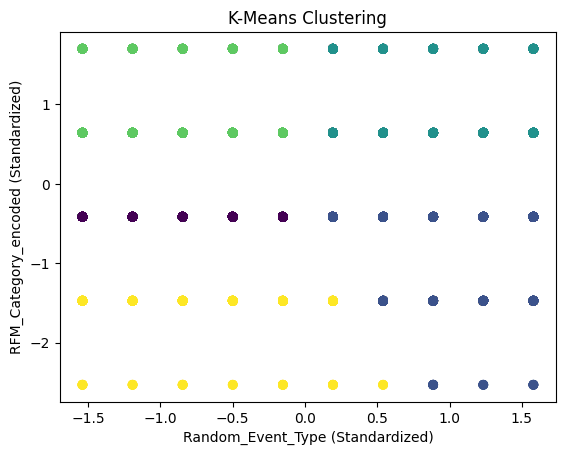

In [177]:
X = df[['Random_Event_Type', 'RFM_Category_encoded']]
kmeans_clustering(X, num_clusters=5)

## Other Notes - Ignore

**Option 1: Recency_Score and RFM_category**

Recency_Score: Indicates how recently a tourist visited. A lower recency score suggests a more recent visit.

RFM_Category_encoded: Represents the varying levels of engagement and value.

**explantion:**


Clusters can be used to tailor marketing strategies. For example we can design specific promotions/ offers for each cluster based on their recency and RFM characteristics. High-value tourists might receive loyalty program benefits, while those at risk of churning could be targeted with special incentives to encourage their return.

We can also take into account other attributes for targetted marketting usch as age, hobby, occupation, spendings, etc

We have 5 categories in RFM_category column. However elbow method would give us better clustering number.

The visitors are grouped into 3 clusters based on how recent they have visited Qatar.

The green cluster represnts the least interested visitors while the blue represents the high-valued visitors and purple one are in between.



**Option 2: RFM_category with nationality_group**

Profiling the RFM category based on nationality group



Side NOTE: The targetted marketting are abit clear now. for example we can offer the green cluster some package that inlcude spice of their interest based on for example hobby, occupation . we can advertise them about some workshops that rae goona take place in qatar as per their occupation that would benefit them , also some entertainment events/festival based on their hobby.

we can also do targetted marketting for othe rtwo cluster in similar approach with diff idea.

additionally this is just one way of clustering we can have many option of clustering for example:
RFM_category with montary_score where we can suggest high spenders some thing and low one something else


if we adjust the data later we can also have some of teh following as well:.
RFM_category with nationality_group,
\recency score with nationality . here we can view what sort of nationalities arrived qatar and how recent .

